In [7]:
#https://www.kaggle.com/fedesoriano/heart-failure-prediction
import pandas as pd 
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt


In [8]:
data = pd.read_csv("heart_attack_dataset.csv")

In [9]:
display(data)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [11]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [12]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

C:\Users\USER\AppData\Local\Temp\ipykernel_10108\2379325342.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])##histogram


<AxesSubplot: >

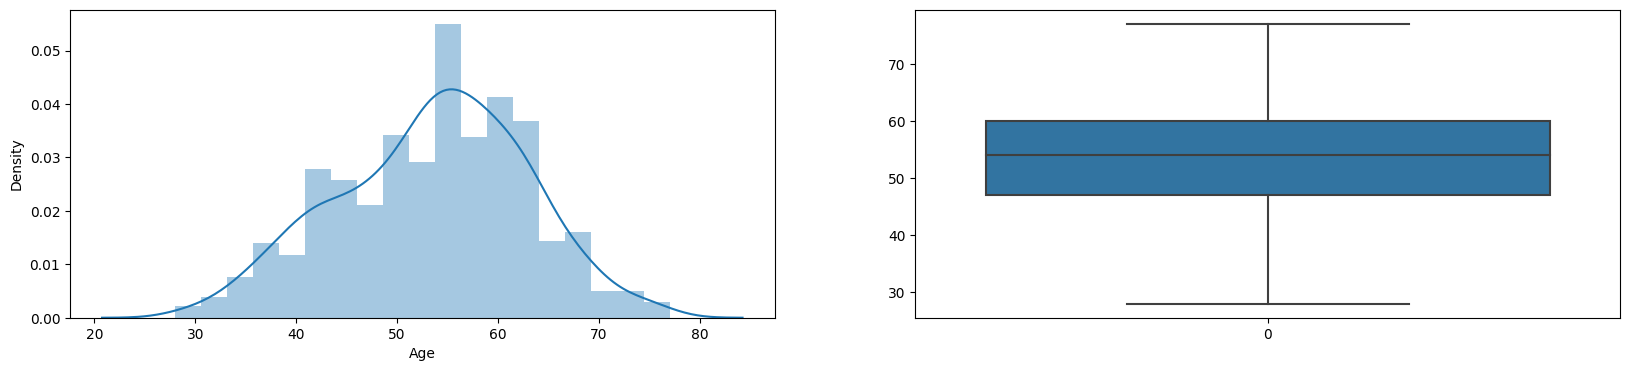

In [13]:
#Univariate analysis age.
import seaborn as sns
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(data['Age'])##histogram
f.add_subplot(1,2,2)
sns.boxplot(data['Age'])##boxplot
# in this visualization we see a median of age of 53 years old, with not outliers identify in the box plot 

C:\Users\USER\AppData\Local\Temp\ipykernel_10108\1866509338.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['RestingBP'])


<AxesSubplot: xlabel='RestingBP', ylabel='Density'>

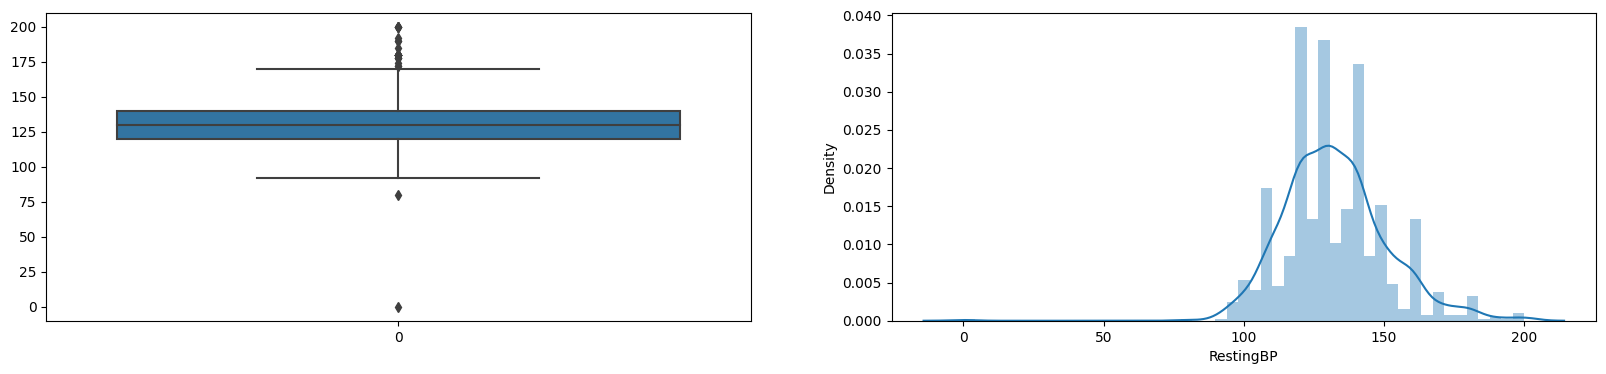

In [14]:
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.boxplot(data['RestingBP'])
f.add_subplot(1,2,2)
sns.distplot(data['RestingBP'])

#we are analyzing the resting blood pressure, in this dataset with have some outliers
#for example we have a observation of estingBP of 200 and another of 0
#since this model will be working not just on hospital but also mobile,
#this observation can be inference of clearly dangereous from the user.

In [15]:
categorical = data.select_dtypes(include= "object")
numerical = data.select_dtypes(include = ["int64", "float64"])
dummies = pd.get_dummies(categorical)
db = pd.concat([dummies, numerical ], axis = 1)
display(db)

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,...,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,0,1,0,1,0,0,0,1,0,1,...,0,0,1,40,140,289,0,172,0.0,0
1,1,0,0,0,1,0,0,1,0,1,...,0,1,0,49,160,180,0,156,1.0,1
2,0,1,0,1,0,0,0,0,1,1,...,0,0,1,37,130,283,0,98,0.0,0
3,1,0,1,0,0,0,0,1,0,0,...,0,1,0,48,138,214,0,108,1.5,1
4,0,1,0,0,1,0,0,1,0,1,...,0,0,1,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0,1,0,0,0,1,0,1,0,1,...,0,1,0,45,110,264,0,132,1.2,1
914,0,1,1,0,0,0,0,1,0,1,...,0,1,0,68,144,193,1,141,3.4,1
915,0,1,1,0,0,0,0,1,0,0,...,0,1,0,57,130,131,0,115,1.2,1
916,1,0,0,1,0,0,1,0,0,1,...,0,1,0,57,130,236,0,174,0.0,1


In [16]:
X = db.drop('HeartDisease', axis = 1 )
Y = db['HeartDisease']
X

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,40,140,289,0,172,0.0
1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,49,160,180,0,156,1.0
2,0,1,0,1,0,0,0,0,1,1,0,0,0,1,37,130,283,0,98,0.0
3,1,0,1,0,0,0,0,1,0,0,1,0,1,0,48,138,214,0,108,1.5
4,0,1,0,0,1,0,0,1,0,1,0,0,0,1,54,150,195,0,122,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0,1,0,0,0,1,0,1,0,1,0,0,1,0,45,110,264,0,132,1.2
914,0,1,1,0,0,0,0,1,0,1,0,0,1,0,68,144,193,1,141,3.4
915,0,1,1,0,0,0,0,1,0,0,1,0,1,0,57,130,131,0,115,1.2
916,1,0,0,1,0,0,1,0,0,1,0,0,1,0,57,130,236,0,174,0.0


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2 , random_state = 1)
X_train.shape, Y_train.shape

((734, 20), (734,))

In [18]:
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
Model1 = RandomForestClassifier(max_depth=9)
Model2 = LogisticRegression()
Model3 = SVC(kernel='linear', probability=True)

#fitting the models
Model1.fit(X_train, Y_train)
Model2.fit(X_train, Y_train)
Model3.fit(X_train, Y_train)


c:\Users\USER\anaconda3\envs\tf2rl-cookbook\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC(kernel='linear', probability=True)

In [19]:
def evaluator_model(Model, x_train,x_test, y_train, y_test):
  predict_train = Model.predict(x_train)
  predict_test =  Model.predict(x_test)
  print("Accuracy on training Data: {:.3f}".format(accuracy_score(y_train,predict_train)))
  print("Accuracy on test Data: {:.3f}".format(accuracy_score(y_test,predict_test)))

In [20]:
print("RandomForestClassifier")
evaluator_model(Model1,X_train, X_test, Y_train, Y_test)
print("Logistic Regression")
evaluator_model(Model2,X_train, X_test, Y_train, Y_test)
print("SVM")
evaluator_model(Model3,X_train, X_test, Y_train, Y_test)

RandomForestClassifier
Accuracy on training Data: 0.974
Accuracy on test Data: 0.902
Logistic Regression
Accuracy on training Data: 0.862
Accuracy on test Data: 0.902
SVM
Accuracy on training Data: 0.864
Accuracy on test Data: 0.908


In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
expected = Y_test

predict_test =  Model1.predict(X_test)
matrix = classification_report(expected,predict_test)
print('confusion matrix Random Forest :\n',matrix)

predict_test2 =  Model2.predict(X_test)
matrix = classification_report(expected,predict_test2)
print('confusion matrix Logistic Regreesion :\n',matrix)

predict_test3 =  Model3.predict(X_test)
matrix = classification_report(expected,predict_test3)
print('confusion matrix SVM :\n',matrix)

confusion matrix Random Forest :
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        74
           1       0.91      0.93      0.92       110

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184

confusion matrix Logistic Regreesion :
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        74
           1       0.91      0.93      0.92       110

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184

confusion matrix SVM :
               precision    recall  f1-score   support

           0       0.89      0.88      0.88        74
           1       0.92      0.93      0.92       110

    accuracy                           0.91       184
   macro avg       0.90      0

In [22]:
pred_prob1 = Model1.predict_proba(X_test)
pred_prob2 = Model2.predict_proba(X_test)
pred_prob3 = Model3.predict_proba(X_test)

from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(Y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(Y_test, pred_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

0.9497542997542997 0.954791154791155 0.954914004914005


C:\Users\USER\AppData\Local\Temp\ipykernel_10108\3850535347.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


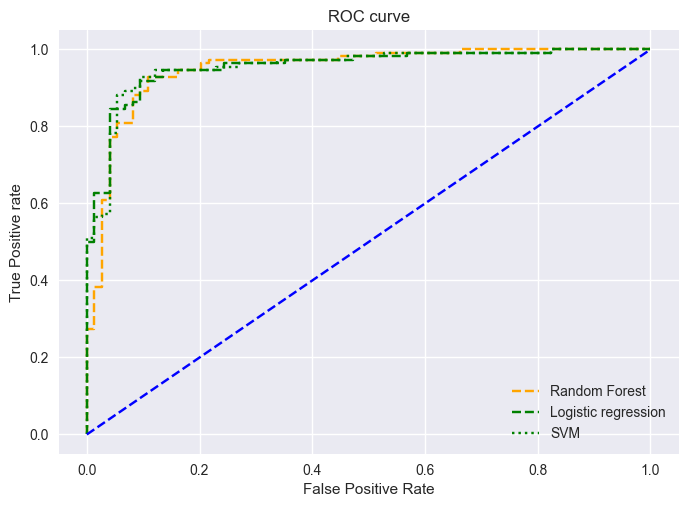

In [23]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(Y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(Y_test, pred_prob3[:,1])

print(auc_score1, auc_score2, auc_score3)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Logistic regression')
plt.plot(fpr3, tpr3, linestyle='dotted',color='green', label='SVM')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

In [24]:
import joblib as jb
jb.dump(Model3, "SVM.pkl")

['SVM.pkl']

In [25]:
model_columns = list(X_train.columns)
jb.dump(model_columns, "models_columns.pkl")

['models_columns.pkl']